# Programmier-Workshop Tag 2

## Klassen
### Was sind Klassen? 

Mit Klassen sind hilfreiche Werkzeuge, die es erlauben in einer Variable (Hier heißen diese "Objekt") mehrere verschiedene Variablen und sogar Methoden zu speichern. Beispielsweise kann mit einer Klasse ein Roboter beschrieben werden, der einen Namen und eine bestimmte Farbe haben soll. Außerdem soll dieser Roboter noch bestimmte Sachen ausführen können, wie zum Beispiel gehen und sprechen. Die Klasse dient als eine Vorlage für so einen Roboter, da die Attribute, wie z.B. der Name und die Farbe des Roboters, erst beim Erstellen des Roboter-Objekts definiert werden.

### Funktionsweise einer Klasse
### Attribute


In [1]:
class MeineKlasse:
    zahl1 = 2
    text2 = 'Hallo'

In dem oberen Beispiel wurde die Klasse <code>MeineKlasse</code> definiert. Diese enthält die zwei Variablen <code>zahl1</code> und <code>zahl2</code>. 

Ein Objekt dieser Klasse wird mit der Zeile

In [2]:
myclass = MeineKlasse()

erstellt. Nun kann auf die Variablen in der Klasse auf folgende Art zugegriffen werden.

In [3]:
myclass.zahl1

2

In [4]:
myclass.text2

'Hallo'

Es können auch neue Variablen in dem Objekt definiert werden. 

In [5]:
myclass.neueZahl = 42
myclass.neueZahl

42

### Methoden

Wie bereits beschrieben können Klassen auch Methoden enthalten. Die wichtigste Methode einer Klasse ist die <code>\__init__</code>-Methode (Sie muss genauso mit zwei Unterstrichen an jeder Seite geschrieben werden). Diese Methode wird aufgerufen, wenn ein Objekt mit dieser Klasse erstellt wird und wird daher auch "Konstruktor" genannt. 

Im Folgenden wird eine Vektorklasse mit der <code>\__init__</code>-Methode definiert (Dieses Beispiel dient nur, um die Funktionsweise darzustellen. Natürlich ist es besser statt dieser Klasse <code>numpy.array</code> zu verwenden.):

In [6]:
from math import sqrt


class Vektor:
    
    def __init__(self,xwert,ywert,zwert):
        #Diese drei Zeilen kann man in Einer zusammenfassen: self.x, self.y, self.z = xwert, ywert, zwert
        self.x = xwert 
        self.y = ywert
        self.z = zwert
        
    def gibNorm(self):
        return sqrt(self.x**2+self.y**2+self.z**2)

Der erste Parameter aller Methoden in Klasse ist <code>self</code>. <code>self</code> dient als Referenz auf das (noch zu erstellende) Objekt. Die weiteren Parameter werden angeben, wenn das Objekt erstellt wird. Damit diese Parameter auch außerhalb der Methode sichtbar sind, werden die Parameter in den Attributen <code>self.x</code>, <code>self.y</code> und <code>self.z</code> gespeichert. 

Nun können Vektor-Objekte erstellt werden:

In [7]:
v1 = Vektor(3,1,4)
v2 = Vektor(1,5,9)

In [8]:
v1.gibNorm()

5.0990195135927845

In [9]:
v2.gibNorm()

10.344080432788601

Leider funkionieren Vektorrechnungen wie z.B. die Vektoraddition nicht:

In [13]:
v1+v2

TypeError: unsupported operand type(s) for +: 'Vektor' and 'Vektor'

Zum Glück erlaubt uns Python zu definieren was die Operatoren tun sollen. Dies nennt man Operator-Überladung.

## Magische Methoden und Operator-Überladung

Wenn in Python ein Operator wie "+" oder "-" verwendet wird, dann wird im Hintergrund eine Methode, die die Operation durchführt, aufgerufen.

Beispiel:

In [14]:
num = 5
num + 3

8

ist das Selbe wie

In [15]:
num.__add__(3)

8

oder

In [16]:
num = 22
num/7

3.142857142857143

ist das Selbe wie

In [17]:
num.__truediv__(7)

3.142857142857143

In Klassen haben wir die magische Methode <code>\__init__</code> verwendet, um einen Objekt zu initialisieren. Eine weitere nützliche Methode, die wir in Klassen verwenden können ist die <code>\__str__</code>-Methode. Sie wird durch <code>print()</code> und durch <code>str()</code>. In der <code>\__str__</code>-Methode wird gesagt, was in die Konsole geschrieben werden soll. In der Vektorklasse kann diese Methode so aussehen:

In [18]:
class Vektor:
    
    def __init__(self,xwert,ywert,zwert):
        self.x = xwert 
        self.y = ywert
        self.z = zwert
        
    def __str__(self):
        #Die Klammern sind Platzhalter für die Attribute in format()
        return '({},{},{})'.format(self.x,self.y,self.z)

In [19]:
v3 = Vektor(9,8,1)
print(v3)

(9,8,1)


Jetzt da wir wissen, welche Methoden bei Operatoren aufgerufen werden, können wir diese neu definieren. Dies nennt man "Operator-Überladung".

Möchte ich beispielsweise meine Vektoren addieren können, kann ich die <code>\__add__</code>-Methode in der Vektorklasse neu definieren:

In [20]:
class Vektor:
    
    def __init__(self,xwert,ywert,zwert):
        self.x = xwert 
        self.y = ywert
        self.z = zwert
        
    def __add__(self, other):
        """ Der Vektor 'self' steht auf der linken Seite des Operators '+' und 'other' steht auf der rechten Seite. """
        neuX = self.x + other.x
        neuY = self.y + other.y
        neuZ = self.z + other.z
        return Vektor(neuX,neuY,neuZ)
    
    def __repr__(self): #Diese Methode ist ähnlich zu __str__. Hierbei muss man nicht 'print()' verwenden.
        return '({},{},{})'.format(self.x,self.y,self.z)

In [21]:
v3 = Vektor(9,8,1)
v4 = Vektor(3,1,4)
v3 + v4

(12,9,5)

## 3D Plots und Animationen

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt

Viele physikalische Probleme sind im dreidimensionalem euklidischen Raum. Es ist also nützlich zu wissen, wie man mit <code>matplotlib</code> 3D-Abbildungen erstellt.

Dafür muss zunächst das Modul mit den 3D-Axen importiert werden:

In [23]:
from mpl_toolkits.mplot3d import Axes3D

Nun müssen nur eine Figur erstellt und die neuen Axen hinzugefügt werden:

<IPython.core.display.Javascript object>


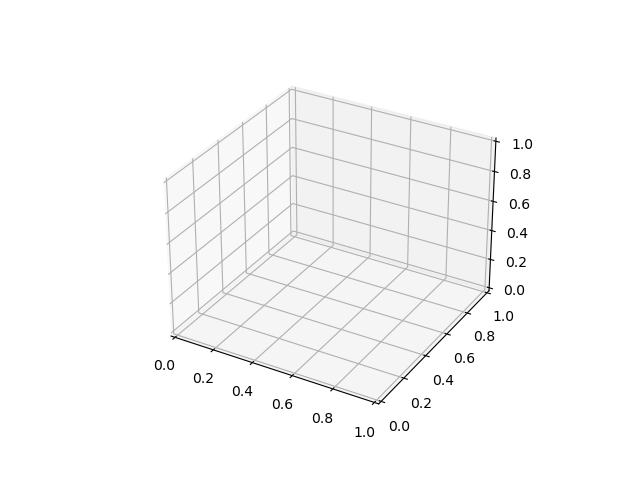

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
plt.show()

Es lassen sich nun wie gewöhnlich mit weiteren Daten für die z-Achse Plots erstellen:

<IPython.core.display.Javascript object>


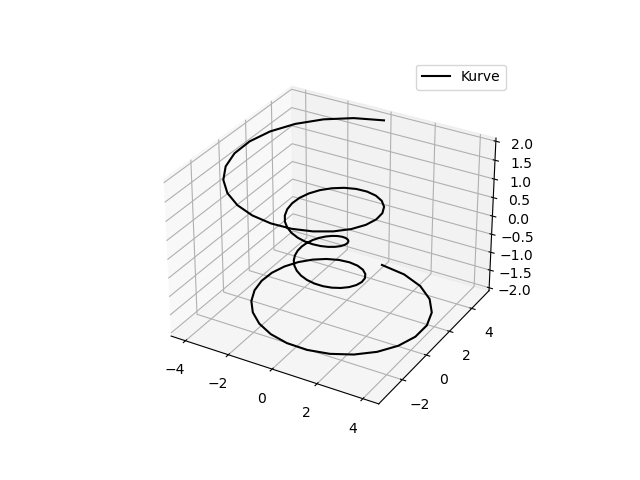

In [39]:
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)


ax.plot(x, y, z, 'k',label='Kurve')
ax.legend(loc='best')

plt.show()

Selbst die Animationen bleiben größtenteils unverändert. Die Funktion <code>line.set_data()</code> nimmt jedoch nur zwei Parameter (x und y-Werte) an. Die Daten der z-Achse werden mit der Funktion <code>line.set_3d_properties()</code> geändert.

In [47]:
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')



line = ax.plot([],[],[],'k-')[0]


ax.set_xlim((-4,4))
ax.set_ylim((-4,4))
ax.set_zlim((-4,4))

#Kurve
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)


dx,dy,dz = [],[],[]
line.set_data(dx,dy)
line.set_3d_properties(dz)

    
def animieren(frame):
    print(x[frame])
    dx.append(x[frame])
    dy.append(y[frame])
    dz.append(z[frame])
    
    #x und y Werte hier
    line.set_data(dx,dy)
    
    #z Werte hier
    line.set_3d_properties(dz)
    return line,
    
anim = FuncAnimation(fig, animieren, frames = 100, interval = 20, blit = True)


plt.show()

<IPython.core.display.Javascript object>

AttributeError: 'list' object has no attribute 'shape'

## Aufgabe 

Erstelle eine Ball-Klasse. Der Ball soll als Eigenschaft einen Radius, Position und Geschwindigkeit besitzen. In der Klasse soll es die Methode <code>bewegen()</code> geben, die beschreibt, wie der Ball sich zu bewegen hat. Die Klasse soll ebenfalls die Methode <code>draw()</code> besitzen, in der der Ball in die Axen gezeichnet werden soll. Als Bonusaufgabe kann man noch die Methode <code>elStoss()</code> implementieren, die einen elastischen Stoß ausübt, wenn zwei Bälle kollidieren. 

Hier ist eine Vorlage für die Ball-Klasse:

In [27]:
class Ball:
    
    
    
    #Hier fehlen die Parameter für dei Anfangsposition und -geschwindigkeit sowie für den Radius
    def __init__(self):
        #Diese Werte müssen gleich den Parametern gesetzt werden
        self.r = 0 
        self.x = 0
        self.y = 0
    
    def bewegen(self):
        #Hier soll der sich Ball mit Geschwindigkeit bewegen und seine Position aktualisieren. 
        pass
    
    def draw(self, ax):
        #Die Axen sind durch den Parameter gegeben. Der Ball muss nur gezeichnet werden.
        pass
    
    
    def kollision(self,other):
        #Diese Methode überprüft, ob der Ball mit einem anderen kollidiert
        pos1 = np.array([self.x,self.y])
        pos2 = np.array([other.x,other.y])
        abstand = np.linalg.norm(pos1-pos2)
        
        if abstand <= (self.r + other.r):
            return True
        else:
            return False
    
    
    def elStoss(self,other):
        #Die Bälle 'self' und 'other' stoßen sich elastisch ab
        pass
    
    

## Das nächste Mal

1. **Lorentz-Attraktor**
Der Flügelschlag eines Schmetterlings kann wenige Tage später auf der anderen Seite der Erde einen Sturm auslösen. Das Schmetterlingseffekt ist die berühmteste Metapher für die Chaostheore. Das Ziel für nächstes Mal ist es, dieses chaotische Verhalten anhand des Lorentz-Attraktors visuell mit Matplotlib zu animieren.
1. **Oberflächenplots**
In 3D erlaubt uns Matplotlib nicht nur Linien und Punkte zu zeichnen, sondern auch krumme Oberflächen auf verschiedenen Arten darzustellen und zu animieren.  Dies erlaubt es beispielsweise eine Welle zu simulieren.
1. **Einführung in <code>sympy</code> und <code>sympy.physics.mechanics</code>**
SymPy ("Symbolic Python") ermöglicht symbolisches Rechnen in Python. Sympy beherrscht einfache symbolische Arithmetik bis hin zu Differential- und Integralrechnungen und sogar Quantenmechanik. Auf Wunsch lassen sich Rechnungen und Ergebnisse sogar in TeX ausgeben. 
Das Modul <code>sympy.physics.mechanics</code> wird uns das Simulieren von komplexeren mechanischen Systemen vereinfachen. Das Modul ermöglicht es nur anhand der Zwangsbedingungen und der äußeren Kräfte eines Systems die kompletten Bewegungsgleichugen des Systems aufzustellen. Diese Methode verbessert die Leistung und ermöglicht somit die Simulation von Vielteilchensystemen in Python.